In [9]:
import json
import os


In [10]:
root = "/Users/janalbrecht/Downloads"
version = "12"

In [11]:
def load_data(root, version, load_difftext=True, load_msgtext=True, load_diff=True, load_msg=True,
                  load_variable=True, load_word2index=True):
        # java load data from disk
        if load_difftext:
            difftext = json.load(open('{}/data4CopynetV3/difftextV{}.json'.format(root, version)))
        if load_msgtext:
            msgtext = json.load(open('{}/data4CopynetV3/msgtextV{}.json'.format(root, version)))
        if load_diff:
            difftoken = json.load(open('{}/data4CopynetV3/difftokenV{}.json'.format(root, version)))
            diffmark = json.load(open('{}/data4CopynetV3/diffmarkV{}.json'.format(root, version)))
            diffatt = json.load(open('{}/data4CopynetV3/diffattV{}.json'.format(root, version)))
        if load_msg:
            msg = json.load(open('{}/data4CopynetV3/msgV{}.json'.format(root, version)))
        if load_variable:
            variable = json.load(open('{}/data4CopynetV3/variableV{}.json'.format(root, version)))
        return difftext, msgtext, difftoken, diffmark, diffatt, msg, variable

In [12]:
data = load_data(root, version, load_word2index=False)

In [13]:
print([len(d) for d in data])

[90661, 90661, 90661, 90661, 90661, 90661, 90661]


In [14]:
json_data = {
    i: {
        'difftext': data[0][i],
        'msgtext': data[1][i],
        'difftoken': data[2][i],
        'diffmark': data[3][i],
        'diffatt': data[4][i],
        'msg': data[5][i],
        'variable': data[6][i],
    } 
    for i in range(len(data[0]))
}

In [16]:
print(json_data[0]["difftext"])
print(json_data[0]["msgtext"])

diff --git a/codec-http/src/main/java/io/netty/handler/codec/http/HttpRequestEncoder.java b/codec-http/src/main/java/io/netty/handler/codec/http/HttpRequestEncoder.java
index e4ecae8..c7aa051 100644
--- a/codec-http/src/main/java/io/netty/handler/codec/http/HttpRequestEncoder.java
+++ b/codec-http/src/main/java/io/netty/handler/codec/http/HttpRequestEncoder.java
@@ -35,7 +35,7 @@ public class HttpRequestEncoder extends HttpObjectEncoder<HttpRequest> {
 
     @Override
     protected void encodeInitialLine(ByteBuf buf, HttpRequest request) throws Exception {
-        buf.writeBytes(request.getMethod().toString().getBytes(CharsetUtil.US_ASCII));
+        encodeAscii(request.getMethod().toString(), buf);
         buf.writeByte(SP);
 
         // Add / as absolute path if no is present.
@@ -51,7 +51,7 @@ public class HttpRequestEncoder extends HttpObjectEncoder<HttpRequest> {
         buf.writeBytes(uri.getBytes(CharsetUtil.UTF_8));
 
         buf.writeByte(SP);
-        buf.writeBytes(req

In [17]:
print(len(json_data[0]["difftoken"]))

165


## How many tokens does a diff contain?

(array([ 2024.,  7921., 13815., 14908., 12976., 10910.,  9334.,  8250.,
         7053.,  3470.]),
 array([  9. ,  27.9,  46.8,  65.7,  84.6, 103.5, 122.4, 141.3, 160.2,
        179.1, 198. ]),
 <BarContainer object of 10 artists>)

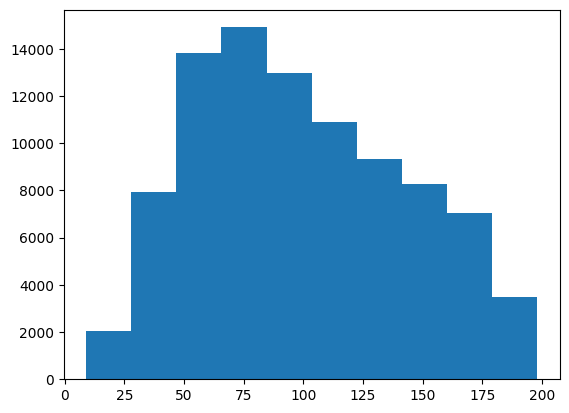

In [24]:
# %pip install -q matplotlib
import matplotlib.pyplot as plt
plt.hist([len(dt["difftoken"]) for dt in json_data.values()])

## Thoughts about the dataset CoDiSum

The dataset is interesting, but it is not structured enough to be used for my case. I need a full history of commits which should be indexed then and used for new commit generation, while only those commits would be used, that would be in the past.

If there are no good datasets to use, it could be a possibility to collect the github repos by myself to organize it as I need it.